<a href="https://colab.research.google.com/github/lakshayae162/EDA/blob/main/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/lakshayae162/EDA/blob/main/Chapter5.ipynb

# **MODULE 5 - EXERCISES**

## **K-Means Clustering**

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
#Loading dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv'
data = pd.read_csv(url)

In [ ]:
# Selecting features 'Anger' and 'id' for clustering
X = data[['Anger', 'id']].values

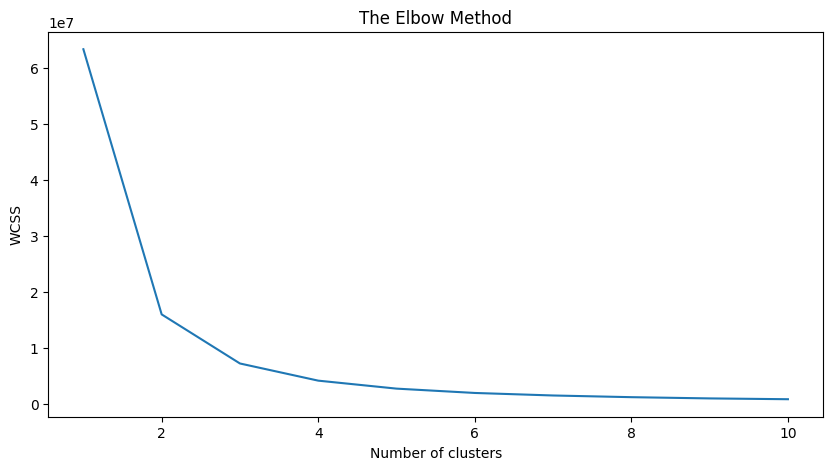

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Applying K-means with the optimal number of clusters (assumed here as 5 for demonstration)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

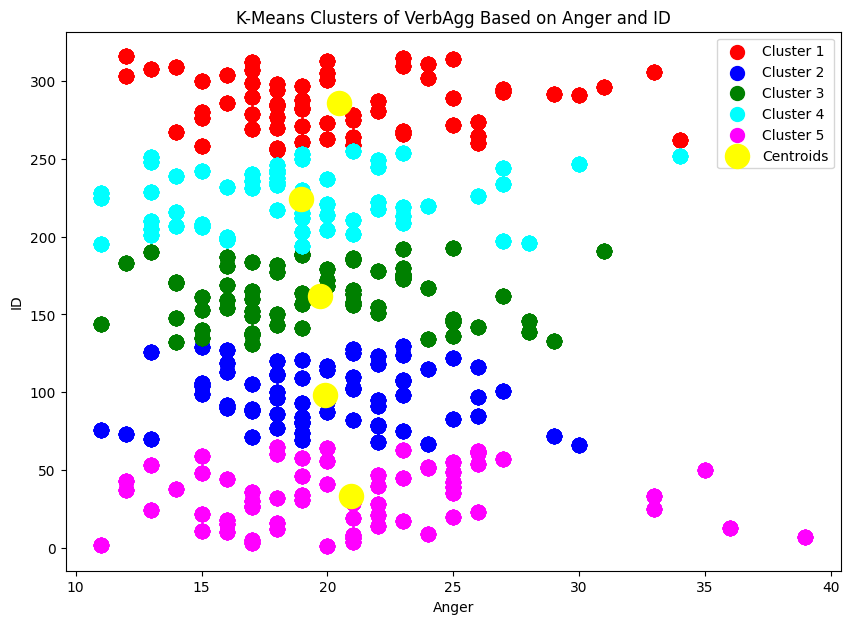

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clusters of VerbAgg Based on Anger and ID')
plt.xlabel('Anger')
plt.ylabel('ID')
plt.legend()
plt.show()

## **Hierarchical Clustering**

In [ ]:
#Importing libraraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
%matplotlib inline

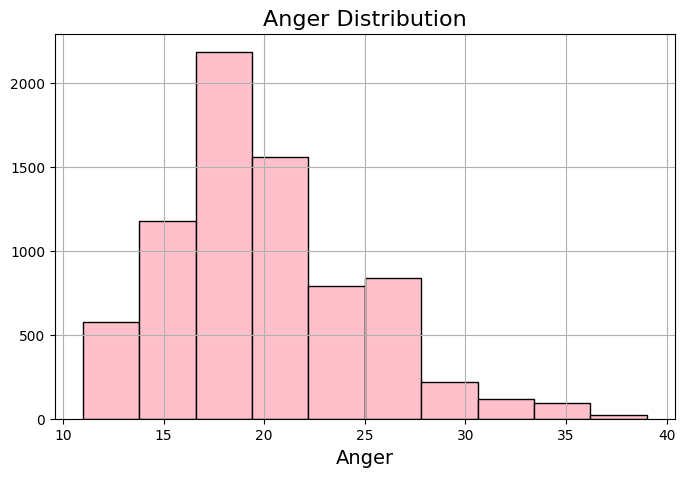

In [ ]:
# Visualize the distribution of 'Anger'
plt.figure(figsize=(8, 5))
plt.title("Anger Distribution", fontsize=16)
plt.xlabel("Anger", fontsize=14)
plt.grid(True)
plt.hist(data['Anger'], color='pink', edgecolor='k')
plt.show()

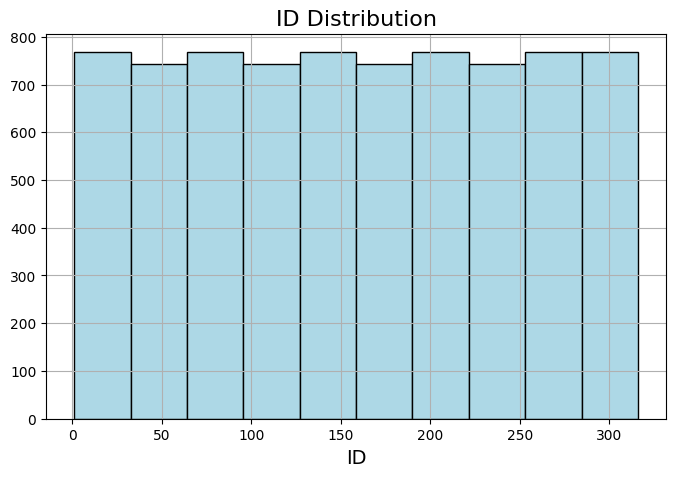

In [ ]:
# Visualize the distribution of 'id'
plt.figure(figsize=(8, 5))
plt.title("ID Distribution", fontsize=16)
plt.xlabel("ID", fontsize=14)
plt.grid(True)
plt.hist(data['id'], color='lightblue', edgecolor='k')
plt.show()

In [ ]:
# Taking features for Dendrogram
X = data[['Anger', 'id']].values

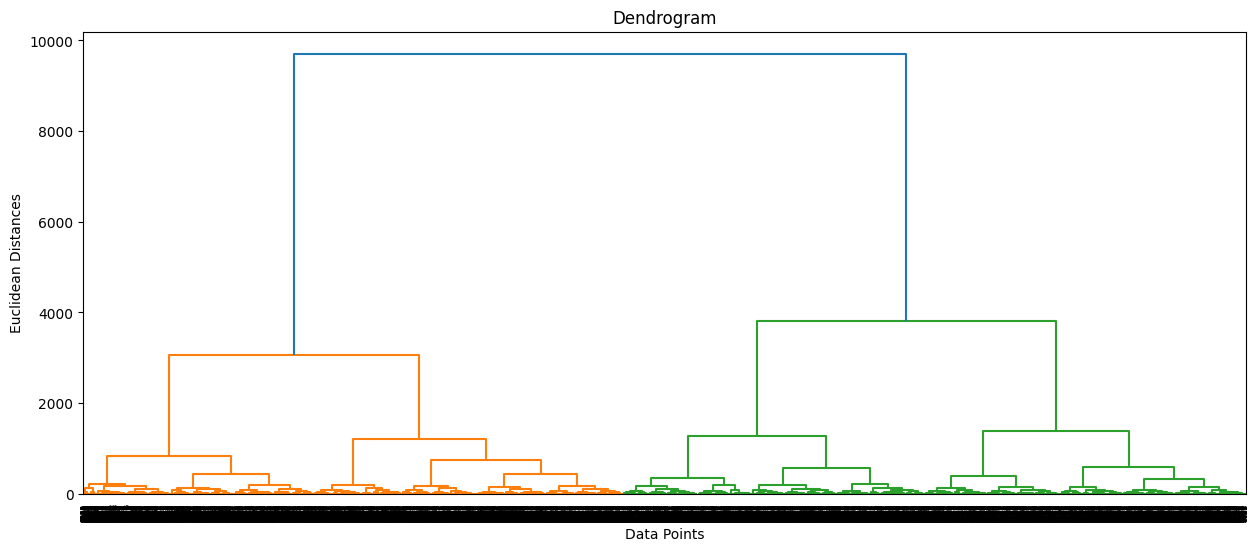

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

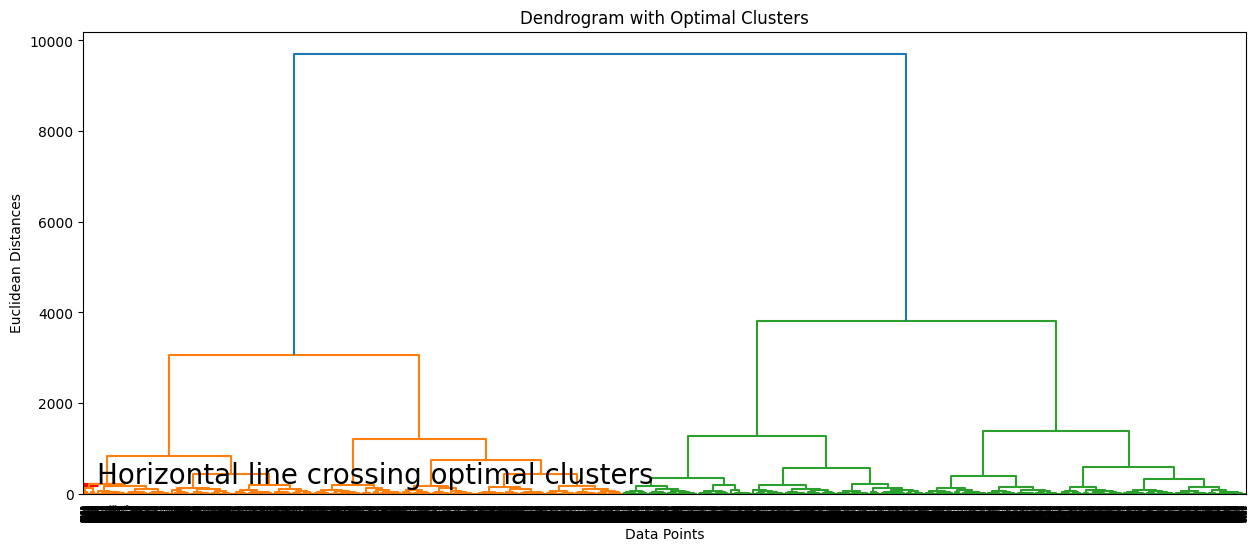

In [ ]:
# Optimal number of clusters - additional dendrogram with horizontal line
plt.figure(figsize=(15, 6))
plt.title('Dendrogram with Optimal Clusters')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.hlines(y=190, xmin=0, xmax=2000, lw=3, linestyles='--', colors='red')
plt.text(x=900, y=220, s='Horizontal line crossing optimal clusters', fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()